## This block will install the primary library for this project, tensorflow

In [5]:
pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


## This block installs a package called seaborn, which makes our visualizations look better

In [6]:
pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


## This block installs pandas, a common data analysis package

In [7]:
pip install -q pandas

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


## This block installs matplotlib, which will allow us to visualize our data. 

In [ ]:
pip install -q matplotlib

## This block installs sklearn, which we will use to transform data to input into our Neural Network 

In [8]:
pip install -q sklearn

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


## This block is a chunk of imports that retrieves the remaining packages needed for the project

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import io
import pandas as pd
import ipywidgets as widgets
sns.set(style="whitegrid")
print("Running Tensorflow Version:", tf.__version__)

ModuleNotFoundError: No module named 'sklearn'

## Run this block to retrieve and display the first few records from winedata.csv and ensure it uploaded correctly.

In [ ]:
winedata_csv = 'https://raw.githubusercontent.com/SpencerRW117/WineAnalysis/main/winequalityN.csv'

#Make the primary dataframe here, named df
df = pd.read_csv(winedata_csv)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# We begin our analysis with a descriptive overview of our data

## A tableview of descriptive statistics (DESCRIPTIVE VISUALIZATION 1)

In [ ]:
#Define the quality_score variable as the last field of our table
quality_score = df['quality']
#Utilizing a built-in data cleaning technique to drop null values from the frame
df.dropna(inplace=True)
#Generate a table of descriptive statistics for EACH numeric variable
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Quality score distribution (DESCRIPTIVE VISUALIZATION 2)

(array([ 246., 2138., 2836., 1079.,  198.]),
 array([3. , 4.2, 5.4, 6.6, 7.8, 9. ]),
 <BarContainer object of 5 artists>)

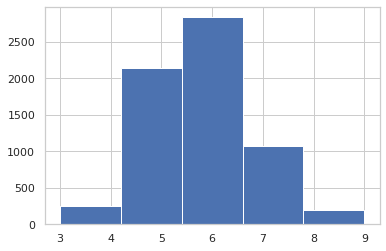

In [ ]:
# Display a histogram showcasing the distribution of quality scores throughout the dataset
plt.hist(quality_score, bins = 5)

## Heatmap of correlation values between chemical attributes (DESCRIPTIVE VISUALIZATION 3)

<AxesSubplot:>

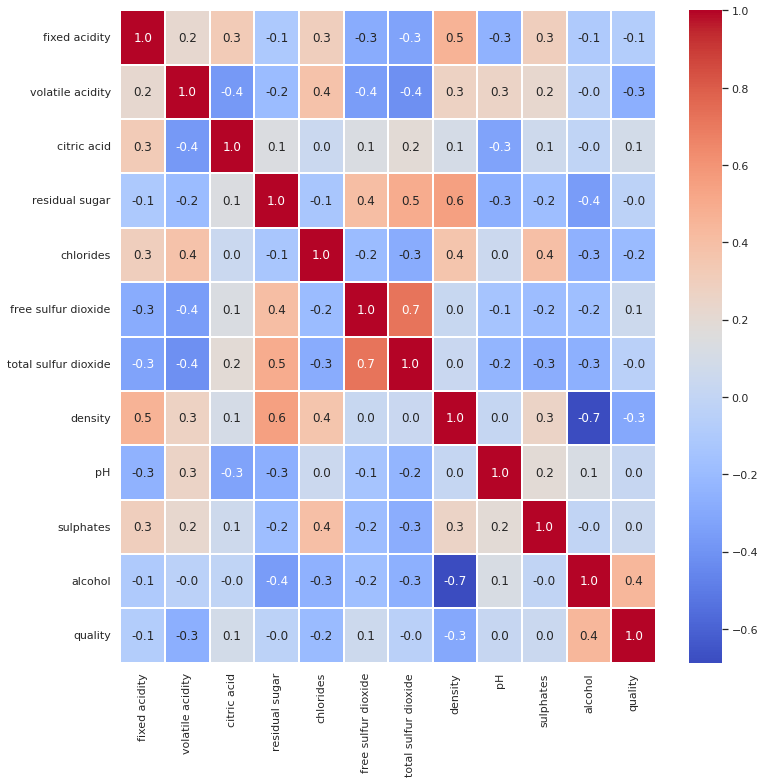

In [ ]:
# Create a heatmap display showing the correlation coefficients for each variable
plt.figure(figsize = (12, 12))
train_corr = df.corr()
sns.heatmap(train_corr, cmap = "coolwarm", annot=True, fmt='.1f', linewidths = 0.05)

## A scatterplot of quality score vs alcohol content (DESCRIPTIVE VISUALIZATION 4)

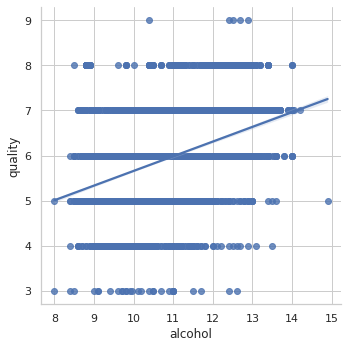

In [ ]:
#Alcohol content has the strongest correlation to quality, so lets see a display of that
sns.lmplot(x = "alcohol", y = "quality", data = df)

# With our new descriptive understanding, we continute to creating a predictive model for our data

## Prepare data for analysis by a dense neural network

In [ ]:
# Separate the dataset into the chemical variables (input) and quality variable (output)
x = pd.DataFrame(columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'
                         , 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], data = df)
y = pd.DataFrame(columns = ['quality'], data = df)

# Divide the data into testing and training components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Standardize features 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## Creating the DNN architecture

In [ ]:
model = Sequential()

#Input
model.add(Dense(x.shape[1], activation='relu', input_dim = x.shape[1]))

#Hidden
model.add(Dense(512,kernel_initializer='normal', activation='relu'))
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dense(64,kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output
model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

# If error messages are outputted from this cell, ignore them. 
# They simply notify the user that the training calculations are not being optimized for GPU calculations using Nvidia's Cuda libnrary. 
# The model will still train and predict properly using only CPU calculations. 

2021-10-11 20:03:29.783595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-11 20:03:29.783657: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-11 20:03:29.783693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-spencerrw117-2dwineanalysis-2dpl6p59mr): /proc/driver/nvidia/version does not exist
2021-10-11 20:03:29.786104: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Compile the model, adam optimizer, loss = mean squared error, metrics mean squared error and mean absolute error
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

# View a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6144      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

## Model is trained in the cell below, technical staff may adjust batch size and number of epochs to yield different prediction accuracy. 
## Model architecture may also be adjusted to reduce training time if imprecise predictions are needed rapidly. 

In [ ]:
# Train the model and store it in a variable called history for later access
history = model.fit(x_train, y_train.to_numpy(), batch_size = 5, epochs = 20, verbose = 1)

Epoch 1/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.4646 - mse: 0.4646 - mae: 0.5343
Epoch 2/20
1034/1034 [==============================] - 7s 6ms/step - loss: 0.4159 - mse: 0.4159 - mae: 0.5060
Epoch 3/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.3807 - mse: 0.3807 - mae: 0.4839
Epoch 4/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.3836 - mse: 0.3836 - mae: 0.4847
Epoch 5/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.3816 - mse: 0.3816 - mae: 0.4822
Epoch 6/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.3729 - mse: 0.3729 - mae: 0.4776
Epoch 7/20
  71/1034 [=>............................] - ETA: 6s - loss: 0.3589 - mse: 0.3589 - mae: 0.4760

<AxesSubplot:>

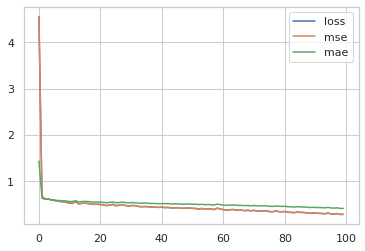

In [ ]:
# Provides a view of the model's accuracy improvement per epoch. (Lower loss values indicate better accuracy.)
losses = pd.DataFrame(history.history)
losses.plot()

In [ ]:
# Predict a quality score for all record in the x_test array. 
y_pred = model.predict(x_test)
y_pred


array([[5.8876786],
       [6.7493424],
       [7.1946163],
       ...,
       [5.3349085],
       [5.9301753],
       [5.5874753]], dtype=float32)

# With our trained model, we can now predict custom inputs of chemical data. 

## Use the sliders below to input the results of a chemical analysis, press "Calculate" to recieve a quality prediction. 

In [ ]:
#Create the 11 widget sliders for the chemical analysis parameters

fixed_acidity = widgets.FloatSlider(value=7.2, min=3.8, max=10.0, step=0.01, description = "Fixed Acidity")
volatile_acidity = widgets.FloatSlider(value=0.33, min=0.08, max=1.0, step=0.01, description = "Volatile Acidity")
citric_acid = widgets.FloatSlider(value=0.33, min=0.0, max=1.0, step=0.01, description = "Citric Acid")
residual_sugar = widgets.FloatSlider(value=5.4, min=1, max=20, step=0.01, description = "Residual Sugar")
chlorides = widgets.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.001, description = "Chlorides")
free_SO2 = widgets.IntSlider(value=30, min=1, max=110, step=1, description = "Free SO2")
total_SO2 = widgets.IntSlider(value=115, min=50, max=225, step=1, description = "Total SO2")
density = widgets.FloatSlider(value=0.99, min=0.95, max=1.0, step=0.0001, description = "Density")
pH = widgets.FloatSlider(value=3.2, min=2.75, max=3.80, step=0.01, description = "pH")
sulfates = widgets.FloatSlider(value=0.0, min=0.35, max=0.75, step=0.001, description = "Sulfates")
alcohol = widgets.FloatSlider(value=10.5, min=8, max=15.0, step=0.01, description = "Alcohol")

widget_box = widgets.VBox([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_SO2, total_SO2,
                          density, pH, sulfates, alcohol])
children = [widget_box]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, "Chemical Properties")
tab


# To run additional predictions, adjust the sliders, re-run the cell below, and click the "Predict Quality" button again. 

In [ ]:
# Store slider data (the user's prediction) in a list.

user_pred = [[fixed_acidity.value, volatile_acidity.value, citric_acid.value, residual_sugar.value,
             chlorides.value, free_SO2.value, total_SO2.value,
             density.value, pH.value, sulfates.value, alcohol.value]]

def calculate_user_prediction(user_prediction):
    prediction_list = scaler.transform(user_prediction)
    return min(model.predict(prediction_list), 10)
    
    

# Define an on_click handler for the calculate button, display the button, and output our prediction. 
def on_calculate_click(_):
    prediction = calculate_user_prediction(user_pred)
    with out:
        out.clear_output()
        print("##### PREDICTION #####")
        print("For a wine with the selected chemical properties, our model predicts a quality score of:", round(prediction[0][0], 2))
        print("##### ACCURACY #####")
        print("Mean Absolute Error: " , round(mean_absolute_error(y_test, model.predict(x_test)), 2))
    return

button = widgets.Button(description="Predict Quality")
out = widgets.Output()

button.on_click(on_calculate_click)
widgets.VBox([button, out])



